<h1>Mall Customers Analysis</h1>

<h4>Used dataset - https://www.kaggle.com/datasets/dataceo/sales-and-customer-data</h4>

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [101]:
customers = pd.read_csv('data/customer_data.csv')
customers.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [102]:
sales = pd.read_csv('data/sales_data.csv')
sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [103]:
print(customers.shape)
customers.dtypes

(99457, 4)


customer_id        object
gender             object
age               float64
payment_method     object
dtype: object

In [104]:
print(sales.shape)
sales.dtypes

(99457, 7)


invoice_no        object
customer_id       object
category          object
quantity           int64
price            float64
invoice_date      object
shopping_mall     object
dtype: object

In [108]:
sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], dayfirst=True)

In [109]:
customers.describe()

,age
count,99338.000000
mean,43.425859
std,14.989400
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


In [110]:
customers.isna().sum()

customer_id         0
gender              0
age               119
payment_method      0
dtype: int64

In [111]:
sales.isna().sum()

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64

In [112]:
full_df = sales.merge(customers, on='customer_id', how='inner')
print(full_df.shape)
full_df.head()

(99457, 10)


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash


<Axes: xlabel='payment_method'>

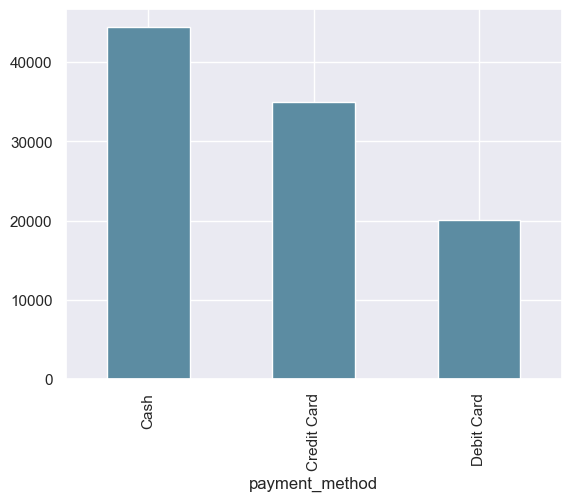

In [113]:
full_df['payment_method'].value_counts().plot(kind='bar')

In [114]:
bins = list(range(10, 71, 10))
labels = [str(x)+'-'+str(bins[i+1]) for i, x in enumerate(bins) if bins[i] != bins[-1]]
labels

['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

In [115]:
full_df['age_group'] = pd.cut(full_df['age'], bins=bins, labels=labels)
full_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method,age_group
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card,20-30
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card,20-30
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash,10-20
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card,60-70
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash,50-60


In [116]:
full_df.groupby('age_group').agg({'price': 'mean', 'quantity': 'mean'})

,price,quantity
age_group,,
10-20,668.350830,2.988072
20-30,692.939300,3.008773
30-40,687.048416,3.003066
40-50,696.714801,2.997375
50-60,686.563453,3.010472
60-70,689.341074,3.002041


No significant difference in price and quantity

In [127]:
print(full_df['invoice_date'].min())
print(full_df['invoice_date'].max())

2021-01-01 00:00:00
2023-03-08 00:00:00


<Figure size 640x480 with 0 Axes>

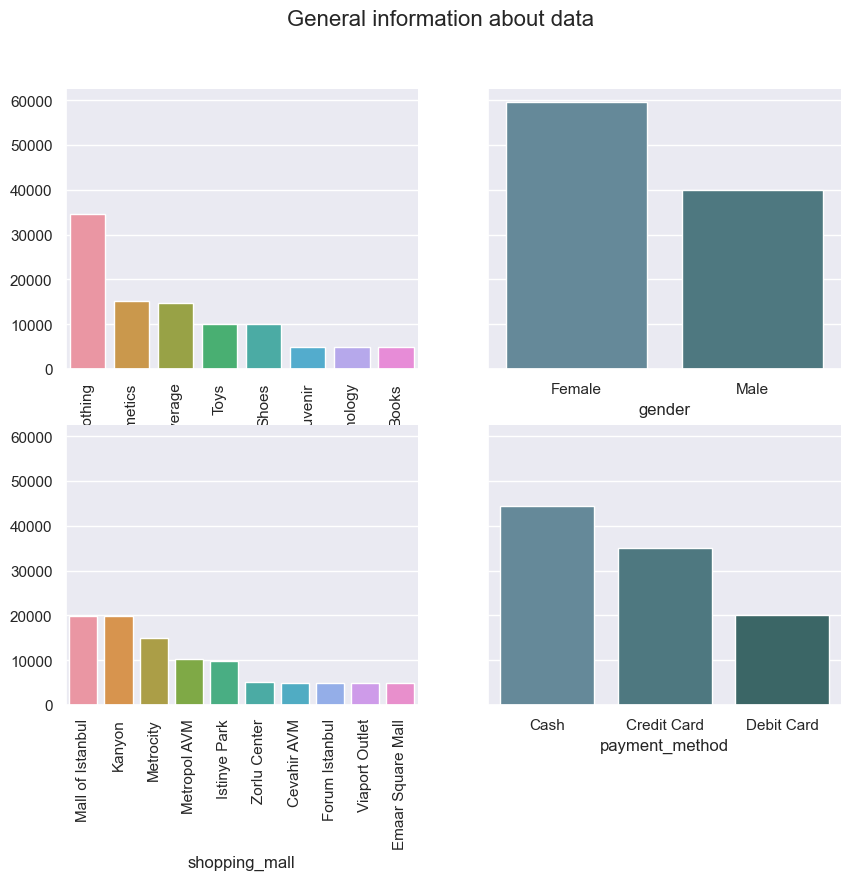

In [118]:
ctg_count = full_df['category'].value_counts()
gender_count = full_df['gender'].value_counts()
mall_count = full_df['shopping_mall'].value_counts()
payment_count = full_df['payment_method'].value_counts()

plt.tight_layout()
sns.set(palette=sns.cubehelix_palette(start=5, light=0.5))
fig, axs = plt.subplots(2,2, sharey=True, figsize=(10, 8))

fig.suptitle('General information about data', fontsize=16)
bar1 = sns.barplot(ax=axs[0, 0], x=ctg_count.index, y=ctg_count.values)
bar2 = sns.barplot(ax=axs[0, 1],x=gender_count.index, y=gender_count.values)
bar3 = sns.barplot(ax=axs[1, 0],x=mall_count.index, y=mall_count.values)
bar4 = sns.barplot(ax=axs[1, 1],x=payment_count.index, y=payment_count.values)

bar1.set_xticks(ticks=bar1.get_xticks(), rotation=90, labels=bar1.get_xticklabels())
bar3.set_xticks(ticks=bar3.get_xticks(), rotation=90, labels=bar3.get_xticklabels())

sns.despine()

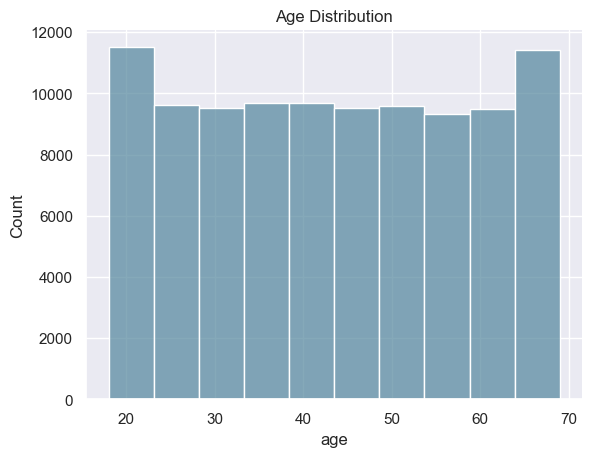

In [121]:
sns.histplot(full_df, x='age', bins=10)
plt.title('Age Distribution')
sns.despine()

In [148]:
full_df['revenue'] = full_df['price'] * full_df['quantity']

In [149]:
full_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method,age_group,revenue
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card,20-30,7502.00
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card,20-30,5401.53
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash,10-20,300.08
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card,60-70,15004.25
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash,50-60,242.40


In [162]:
gender_gap_mall = full_df.groupby(['shopping_mall', 'gender'], as_index=False)['customer_id'].count() \
                         .pivot(index='shopping_mall', columns='gender', values='customer_id')
gender_gap_mall

gender,Female,Male
shopping_mall,,
Cevahir AVM,2940,2051
Emaar Square Mall,2842,1969
Forum Istanbul,3016,1931
Istinye Park,5874,3907
Kanyon,11906,7917
Mall of Istanbul,11902,8041
Metrocity,8941,6070
Metropol AVM,6144,4017
Viaport Outlet,2949,1965


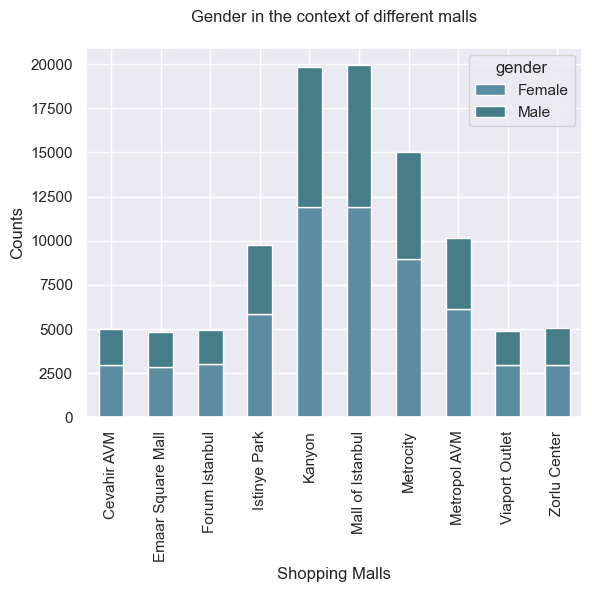

In [166]:
gender_gap_mall.plot(kind='bar', stacked=True)
plt.xlabel('Shopping Malls')
plt.ylabel('Counts')
plt.title('Gender in the context of different malls\n');

In [187]:
df_dropped = full_df.drop(columns=['invoice_no', 'customer_id', 'invoice_date'])
df_dropped[['category','shopping_mall','gender','payment_method','age_group']] = \
    df_dropped[['category','shopping_mall','gender','payment_method','age_group']].apply(LabelEncoder().fit_transform)
corr_df = df_dropped.corr(numeric_only=True)
df_dropped.head()

,category,quantity,price,shopping_mall,gender,age,payment_method,age_group,revenue
0,1,5,1500.40,4,0,28.0,1,1,7502.00
1,4,3,1800.51,2,1,21.0,2,1,5401.53
2,1,1,300.08,6,1,20.0,0,0,300.08
3,4,5,3000.85,7,0,66.0,1,5,15004.25
4,0,4,60.60,4,0,53.0,0,4,242.40


Text(0.5, 1.0, 'Correlation Matrix')

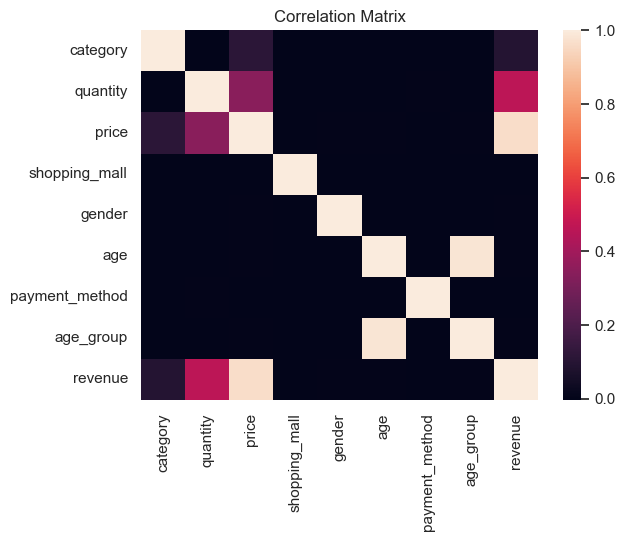

In [190]:
sns.heatmap(corr_df)
plt.title('Correlation Matrix')

There is no correlation between age and quantity as well as revenue from a customer